# Instalação das bibliotecas

In [12]:
#Conectar com o Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, confusion_matrix, f1_score, recall_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
import gensim
from scipy.spatial.distance import cosine
from gensim.models import KeyedVectors, Word2Vec
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

import pickle

# Entendimento da base


In [14]:
df_features = pd.read_csv('/content/drive/MyDrive/Módulo 6/projeto/Bases/base_features')
df_features.head(5)

,autor,sentimento,texto_tratado,sorriso,risos,envergonhado,sorridente,olhos_coracao,beijo_coracao,beijo_olhos_fechados,...,olhos,mao_esquerda,cara_baixo,fantasma,dedo_baixo,assustado,nervoso,apaixonado,feliz,doente
0,winthegame_of,1,"['alvarez', 'marsal', 'estar', 'conosco', 'spo...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,marta_bego,1,"['btgpactual', 'with', 'makerepost', 'entender...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,lmviapiana,2,"['minuto', 'touro', 'ouro']",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ricktolledo,2,"['querer', 'saber', 'banking', 'administrar']",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,donadabolsaoficial,0,"['início', 'guerra', 'rússia', 'ucrânia', 'vel...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_features['texto_tratado'] = df_features['texto_tratado'].str.replace("'", "")
df_features['texto_tratado']

0       [alvarez, marsal, estar, conosco, sportainmet,...
1       [btgpactual, with, makerepost, entender, impac...
2                                   [minuto, touro, ouro]
3                   [querer, saber, banking, administrar]
4       [início, guerra, rússia, ucrânia, velho, apare...
                              ...                        
9112                              [excelente, explicação]
9113                      [atendar, telefone, amor, deus]
9114    [grande, fiis, mercado, não, selecionar, princ...
9115    [erro, financeiro, eliminar, parar, ostentar, ...
9116    [morning, call, não, aparecer, spotify, atuali...
Name: texto_tratado, Length: 9117, dtype: object

In [22]:
df_features = df_features.drop(['autor'], axis=1)
df_features

,sentimento,texto_tratado,sorriso,risos,envergonhado,sorridente,olhos_coracao,beijo_coracao,beijo_olhos_fechados,corado,...,olhos,mao_esquerda,cara_baixo,fantasma,dedo_baixo,assustado,nervoso,apaixonado,feliz,doente
0,1,"[alvarez, marsal, estar, conosco, sportainmet,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,"[btgpactual, with, makerepost, entender, impac...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,"[minuto, touro, ouro]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,"[querer, saber, banking, administrar]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,"[início, guerra, rússia, ucrânia, velho, apare...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9112,2,"[excelente, explicação]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9113,2,"[atendar, telefone, amor, deus]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9114,2,"[grande, fiis, mercado, não, selecionar, princ...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9115,1,"[erro, financeiro, eliminar, parar, ostentar, ...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df_normal = pd.read_csv('/content/drive/MyDrive/Módulo 6/projeto/Bases/nova_base_tratada2')
df_normal.head(5)

,autor,sentimento,texto_tratado
0,winthegame_of,1,"['alvarez', 'marsal', 'estar', 'conosco', 'spo..."
1,marta_bego,1,"['btgpactual', 'with', 'make_repost', 'entenda..."
2,lmviapiana,2,"['minuto', 'touro', 'ouro']"
3,ricktolledo,2,"['querer', 'saber', 'banking', 'administrar']"
4,donadabolsaoficial,0,"['início', 'guerra', 'rússia', 'ucrânia', 'vel..."


In [17]:
df_normal['texto_tratado'] = df_normal['texto_tratado'].str.replace("'", "")
df_normal['texto_tratado']

0       [alvarez, marsal, estar, conosco, sportainmet,...
1       [btgpactual, with, make_repost, entendar, impa...
2                                   [minuto, touro, ouro]
3                   [querer, saber, banking, administrar]
4       [início, guerra, rússia, ucrânia, velho, apare...
                              ...                        
8035                              [excelente, explicação]
8036                      [atendar, telefone, amor, deus]
8037    [grande, fiis, mercado, não, selecionar, princ...
8038    [erro, financeiro, eliminar, parar, ostentar, ...
8039    [morning, call, não, aparecer, spotify, atuali...
Name: texto_tratado, Length: 8040, dtype: object

# Vetorização

In [34]:
df_features

,sentimento,texto_tratado,sorriso,risos,envergonhado,sorridente,olhos_coracao,beijo_coracao,beijo_olhos_fechados,corado,...,olhos,mao_esquerda,cara_baixo,fantasma,dedo_baixo,assustado,nervoso,apaixonado,feliz,doente
0,1,"[alvarez, marsal, estar, conosco, sportainmet,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,"[btgpactual, with, makerepost, entender, impac...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,"[minuto, touro, ouro]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,"[querer, saber, banking, administrar]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,"[início, guerra, rússia, ucrânia, velho, apare...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9112,2,"[excelente, explicação]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9113,2,"[atendar, telefone, amor, deus]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9114,2,"[grande, fiis, mercado, não, selecionar, princ...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9115,1,"[erro, financeiro, eliminar, parar, ostentar, ...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# Função que treina o modelo Word2Vec no corpus do dataframe
def train_word2vec(df, column_name):
    # Obtém as frases tokenizadas
    sentences = df[column_name].tolist()

    # Treina o modelo Word2Vec
    model = Word2Vec(sentences, min_count=1)

    return model

In [36]:
# Função que define os vetores para cada palavra do vocabulario
def get_word_vectors(model, sentence):
    vectors = []
    for word in sentence:
        if word in model.wv:
            vectors.append(model.wv[word]) # Append na lista de vetores
    if vectors:
        return np.sum(vectors, axis=0)/len(sentence) # Soma dos vetores para cada frase
    else:
        return np.zeros(model.vector_size)

# Criação do dataframe de vetores para cada frase
def create_word2vec_dataframe(df, column_name, model):
    sentences = df[column_name].tolist()
    vectors = [get_word_vectors(model, sentence) for sentence in sentences] # Itera para cada frase um vetor
    # Criação do dataframe
    df_vectors = pd.DataFrame(vectors, columns=[f"Vetor{i}" for i in range(model.vector_size)])
    df_word2vec = pd.concat([df, df_vectors], axis=1)
    return df_word2vec

In [37]:
model = train_word2vec(df_features, 'texto_tratado')
df_word2vec = create_word2vec_dataframe(df_features,'texto_tratado', model)
df_word2vec

,sentimento,texto_tratado,sorriso,risos,envergonhado,sorridente,olhos_coracao,beijo_coracao,beijo_olhos_fechados,corado,...,Vetor90,Vetor91,Vetor92,Vetor93,Vetor94,Vetor95,Vetor96,Vetor97,Vetor98,Vetor99
0,1,"[alvarez, marsal, estar, conosco, sportainmet,...",0,0,0,0,0,0,0,0,...,-0.148581,0.034468,-0.266838,-0.288563,-0.075502,0.217553,-0.036420,-0.113925,0.250308,0.124320
1,1,"[btgpactual, with, makerepost, entender, impac...",0,0,0,0,0,0,0,0,...,-0.149511,0.044890,-0.260289,-0.304783,-0.103572,0.246427,-0.040127,-0.070629,0.233605,0.151039
2,2,"[minuto, touro, ouro]",0,0,0,0,0,0,0,0,...,-0.153831,0.116143,-0.271881,-0.453528,-0.036205,0.346630,0.076722,-0.052580,0.314270,0.217700
3,2,"[querer, saber, banking, administrar]",0,0,0,0,0,0,0,0,...,-0.110833,0.051264,-0.268008,-0.360941,-0.141139,0.324270,0.073552,-0.139121,0.220977,0.135113
4,0,"[início, guerra, rússia, ucrânia, velho, apare...",0,0,0,0,0,0,0,0,...,-0.143489,0.027217,-0.260954,-0.296893,-0.103376,0.194103,-0.037764,-0.097237,0.273179,0.147177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9112,2,"[excelente, explicação]",0,0,0,0,0,0,0,0,...,-0.032785,-0.058705,-0.257648,-0.284591,-0.111610,0.057272,-0.050073,-0.087082,0.211442,0.124308
9113,2,"[atendar, telefone, amor, deus]",0,0,0,0,0,0,0,0,...,-0.160828,0.053098,-0.268982,-0.356804,-0.108048,0.251874,-0.010817,-0.103852,0.279178,0.142638
9114,2,"[grande, fiis, mercado, não, selecionar, princ...",0,0,0,0,0,0,0,0,...,-0.115323,0.011879,-0.272741,-0.281411,-0.098025,0.169859,-0.068408,-0.083127,0.270949,0.164788
9115,1,"[erro, financeiro, eliminar, parar, ostentar, ...",0,0,0,0,0,0,0,0,...,-0.140258,0.034775,-0.255121,-0.307691,-0.091777,0.213983,-0.057926,-0.074599,0.260166,0.161905


# Novos testes

In [38]:
df_word2vec

,sentimento,texto_tratado,sorriso,risos,envergonhado,sorridente,olhos_coracao,beijo_coracao,beijo_olhos_fechados,corado,...,Vetor90,Vetor91,Vetor92,Vetor93,Vetor94,Vetor95,Vetor96,Vetor97,Vetor98,Vetor99
0,1,"[alvarez, marsal, estar, conosco, sportainmet,...",0,0,0,0,0,0,0,0,...,-0.148581,0.034468,-0.266838,-0.288563,-0.075502,0.217553,-0.036420,-0.113925,0.250308,0.124320
1,1,"[btgpactual, with, makerepost, entender, impac...",0,0,0,0,0,0,0,0,...,-0.149511,0.044890,-0.260289,-0.304783,-0.103572,0.246427,-0.040127,-0.070629,0.233605,0.151039
2,2,"[minuto, touro, ouro]",0,0,0,0,0,0,0,0,...,-0.153831,0.116143,-0.271881,-0.453528,-0.036205,0.346630,0.076722,-0.052580,0.314270,0.217700
3,2,"[querer, saber, banking, administrar]",0,0,0,0,0,0,0,0,...,-0.110833,0.051264,-0.268008,-0.360941,-0.141139,0.324270,0.073552,-0.139121,0.220977,0.135113
4,0,"[início, guerra, rússia, ucrânia, velho, apare...",0,0,0,0,0,0,0,0,...,-0.143489,0.027217,-0.260954,-0.296893,-0.103376,0.194103,-0.037764,-0.097237,0.273179,0.147177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9112,2,"[excelente, explicação]",0,0,0,0,0,0,0,0,...,-0.032785,-0.058705,-0.257648,-0.284591,-0.111610,0.057272,-0.050073,-0.087082,0.211442,0.124308
9113,2,"[atendar, telefone, amor, deus]",0,0,0,0,0,0,0,0,...,-0.160828,0.053098,-0.268982,-0.356804,-0.108048,0.251874,-0.010817,-0.103852,0.279178,0.142638
9114,2,"[grande, fiis, mercado, não, selecionar, princ...",0,0,0,0,0,0,0,0,...,-0.115323,0.011879,-0.272741,-0.281411,-0.098025,0.169859,-0.068408,-0.083127,0.270949,0.164788
9115,1,"[erro, financeiro, eliminar, parar, ostentar, ...",0,0,0,0,0,0,0,0,...,-0.140258,0.034775,-0.255121,-0.307691,-0.091777,0.213983,-0.057926,-0.074599,0.260166,0.161905


In [39]:
contagem = df_features['sentimento'].value_counts()
print(contagem)

1    3967
2    3179
0    1971
Name: sentimento, dtype: int64


## Definição da função

In [40]:
def classification_random_forest(x, y):
  # Dividir o conjunto de dados em treinamento e teste
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

  # Criar e treinar o modelo Random Forest
  modelo_rf = RandomForestClassifier()
  modelo_rf.fit(x_train, y_train)

  # Fazer previsões no conjunto de teste
  y_pred = modelo_rf.predict(x_test)

  # Calcular a acurácia
  acuracia = accuracy_score(y_test, y_pred)
  print("Acurácia:", acuracia)

  # Calcular o F-score
  fscore = f1_score(y_test, y_pred, average='macro')
  print("F-score:", fscore)

  # Calcular o recall
  recall = recall_score(y_test, y_pred, average='macro')
  print("Recall:", recall)

  # Realizar validação cruzada
  scores = cross_val_score(modelo_rf, x, y, cv=5)  # cv define o número de dobras (folds)
  print("Acurácia da Validação Cruzada:", np.mean(scores))

  return modelo_rf, y_test, y_pred

## Teste da função - COM BALANCEAMENTO

### Modelo

In [46]:
# Balanceamento dos dados
df_negativo = df_word2vec[df_word2vec['sentimento'] == 0]
df_positive = df_word2vec[df_word2vec['sentimento'] == 1]
df_neutral = df_word2vec[df_word2vec['sentimento'] == 2]

df_positive_resampled = resample(df_positive, replace=True, n_samples=len(df_negativo), random_state=42)
df_neutral_resampled = resample(df_neutral, replace=True, n_samples=len(df_negativo), random_state=42)

dfrnn_balanced = pd.concat([df_negativo, df_positive_resampled, df_neutral_resampled])

# Separando os dados em X e y (balanceados)
x = np.array(dfrnn_balanced.drop(['texto_tratado', 'sentimento'], axis=1))
y = np.array(dfrnn_balanced['sentimento'])

model, y_test, y_pred = classification_random_forest(x, y)

Acurácia: 0.7209695603156708
F-score: 0.7211567664730083
Recall: 0.7205992971479728
Acurácia da Validação Cruzada: 0.7211219861747


In [48]:
classification = classification_report(y_test, y_pred)

print("\nRelatório de Classificação:")
print(classification)


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.72      0.73      0.73       625
           1       0.75      0.72      0.73       562
           2       0.70      0.71      0.70       587

    accuracy                           0.72      1774
   macro avg       0.72      0.72      0.72      1774
weighted avg       0.72      0.72      0.72      1774



### Matriz de Confusão

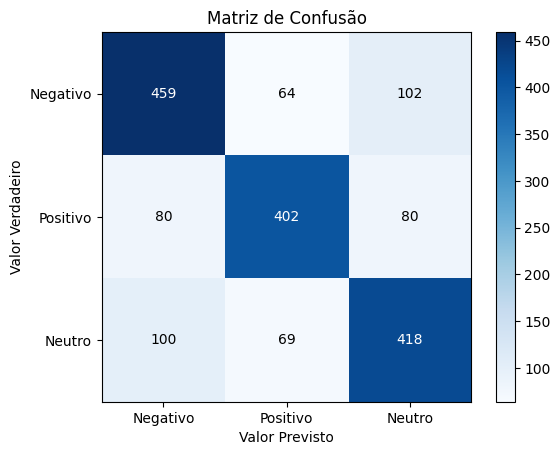

In [47]:
# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plot da matriz de confusão
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Configurações do gráfico
classes = ['Negativo', 'Positivo', 'Neutro']
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes,
       yticklabels=classes,
       title='Matriz de Confusão',
       ylabel='Valor Verdadeiro',
       xlabel='Valor Previsto')

# Adiciona os valores nas células da matriz
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Mostra o gráfico
plt.show()

### Salvando como pkl


In [49]:
# # Salvando o modelo em um arquivo PKL
# with open('/content/drive/MyDrive/Módulo 6/projeto/modelo_rf.pkl', 'wb') as arquivo:
#     pickle.dump(model, arquivo)
# with open('/content/drive/MyDrive/Módulo 6/projeto/modelo_rf.pkl', 'rb') as arquivo:
#     modelo_rf = pickle.load(arquivo)